In [129]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

import keras
from keras import layers

import numpy as np
import matplotlib.pyplot as plt


In [130]:
from keras import backend as K
print(K.backend())

tensorflow


CIFAR-10 Luokitteluprojekti
Projektin tavoite
Tämän ryhmäprojektin tarkoituksena on soveltaa neuroverkkotekniikoita CIFAR-10 kuvaluokitteluongelmaan. Tavoitteena on vertailla kahta erilaista neuroverkkoarkkitehtuuria: täysin yhdistettyä verkkoa (FCN) sekä konvoluutioneuroverkoa (CNN).

Tehtävänanto
Toteuta CIFAR-10 datasetin luokittelu kahdella erillisellä Jupyter Notebookilla:

Käytä täysin yhdistettyä neuroverkkoa (Fully Connected Network, FCN)
Käytä konvoluutioneuroverkkoa (Convolutional Neural Network, CNN)
Voit käyttää mallina ja pohjana MNIST-datasetille tehtyjä työkirjoja:

MNIST_Keras.ipynb
MNIST_Keras_CNN.ipynb
https://github.com/mikkopere/Neuroverkkoprojekti

Vertaile näiden mallien:

Suorituskykyä (tarkkuus testidatalla)
Oppimiskäyrää (training vs. validation loss)
Parametrien määrää
Opetusaikaa
Visualisoi tuloksia:

Näytä esimerkkikuvia ja mallien luokittelutuloksia
Esitä luokkien todennäköisyysjakaumia
Analysoi väärin luokiteltuja kuvia
Ideoita kokeiltavaksi:

Kokeile erilaisia esikäsittelytekniikoita värikuville
Testaa erilaisia verkkoarkkitehtuureja (kerrosten määrä, neuronien määrä)
Kokeile regularisointitekniikoita (dropout, batch normalization)
Tutki data-augmentation -tekniikoiden vaikutusta
Analysoi miksi CNN yleensä toimii paremmin kuvadatalle kuin FCN. Kuinka suureen tarkkuuteen pääset ei malleilla. Realistiset ja toisaalta kunnianhimoiset tavoitteet eli malleilla voisivat olla:

Fully Connected Network (FCN):

realistinen tavoite 50-55 % tarkkuus
kunnianhmoinen tavoite 57-60 % tarkkuus

Convolutional Neural Network (CNN):

realistinen tavoite 75-80 % tarkkuus
kunnianhimoinen tavoite 82-85 % tarkkuus

In [131]:
keras.datasets.cifar10.load_data()


((array([[[[ 59,  62,  63],
           [ 43,  46,  45],
           [ 50,  48,  43],
           ...,
           [158, 132, 108],
           [152, 125, 102],
           [148, 124, 103]],
  
          [[ 16,  20,  20],
           [  0,   0,   0],
           [ 18,   8,   0],
           ...,
           [123,  88,  55],
           [119,  83,  50],
           [122,  87,  57]],
  
          [[ 25,  24,  21],
           [ 16,   7,   0],
           [ 49,  27,   8],
           ...,
           [118,  84,  50],
           [120,  84,  50],
           [109,  73,  42]],
  
          ...,
  
          [[208, 170,  96],
           [201, 153,  34],
           [198, 161,  26],
           ...,
           [160, 133,  70],
           [ 56,  31,   7],
           [ 53,  34,  20]],
  
          [[180, 139,  96],
           [173, 123,  42],
           [186, 144,  30],
           ...,
           [184, 148,  94],
           [ 97,  62,  34],
           [ 83,  53,  34]],
  
          [[177, 144, 116],
           [16

# FCN

In [132]:
# Create the model
inputs = keras.Input(shape=(3072,))
x = layers.Dense(256, activation="relu")(inputs)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")

In [133]:
model.summary()

Model: "mnist_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_20 (InputLayer)     │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 256)            │       786,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 789,258 (3.01 MB)

 Trainable params: 789,258 (3.01 MB)

 Non-trainable params: 0 (0.00 B)

In [134]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

x_train = x_train.reshape(50000, 32*32*3).astype("float32") / 255
x_test = x_test.reshape(10000, 32*32*3).astype("float32") / 255

In [135]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(),
    optimizer=keras.optimizers.AdamW(),
    metrics=["accuracy"]
)

In [136]:
history = model.fit(x_train, y_train, batch_size=256, epochs=50, validation_split=0.05)

Epoch 1/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2505 - loss: 2.1721 - val_accuracy: 0.3280 - val_loss: 1.8521
Epoch 2/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3646 - loss: 1.7988 - val_accuracy: 0.3780 - val_loss: 1.7815
Epoch 3/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3873 - loss: 1.7333 - val_accuracy: 0.4048 - val_loss: 1.6951
Epoch 4/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4128 - loss: 1.6644 - val_accuracy: 0.4012 - val_loss: 1.6814
Epoch 5/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4292 - loss: 1.6155 - val_accuracy: 0.4148 - val_loss: 1.6682
Epoch 6/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4337 - loss: 1.5990 - val_accuracy: 0.4168 - val_loss: 1.6467
Epoch 7/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4466 - loss: 1.5653 - val_accuracy: 0.4408 - val_loss: 1.5894
Epoch 8/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4534 - loss: 1.5533 - val_accuracy: 0.

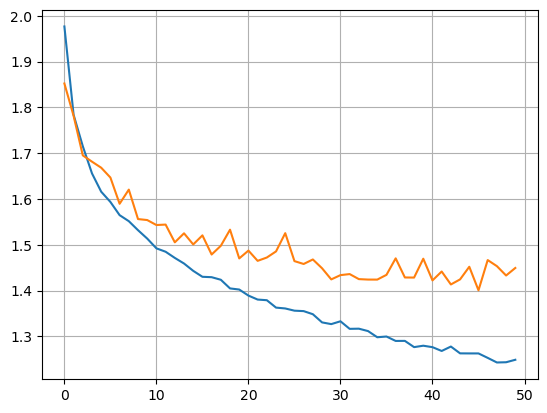

In [137]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.grid()
plt.show()

In [138]:
test_scores = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

313/313 - 0s - 690us/step - accuracy: 0.4940 - loss: 1.4693
Test loss: 1.46933114528656
Test accuracy: 0.49399998784065247


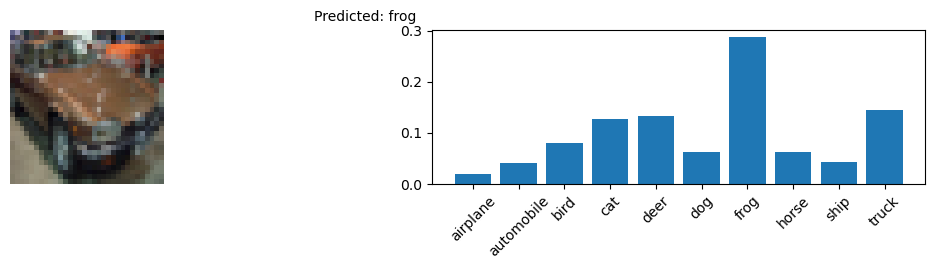

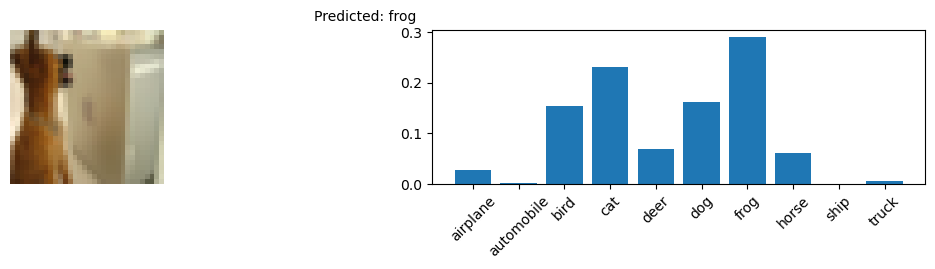

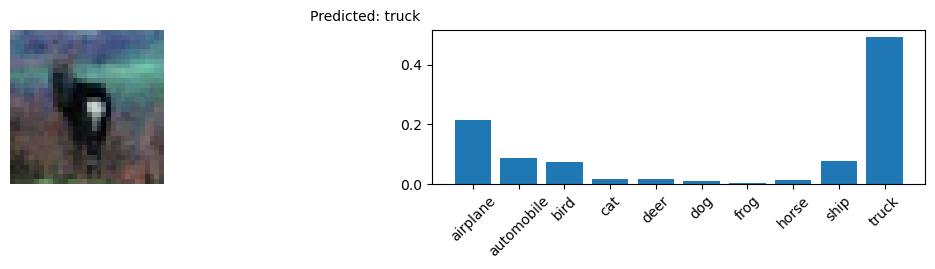

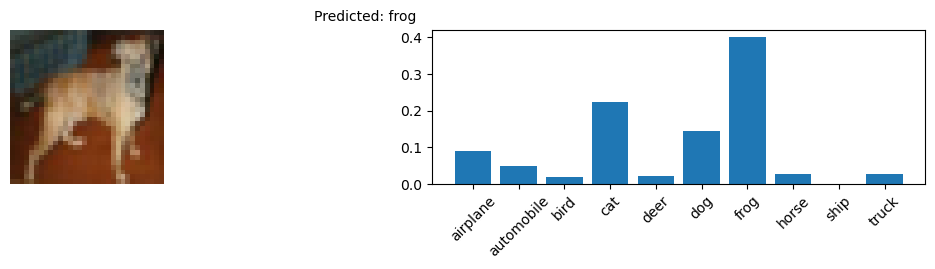

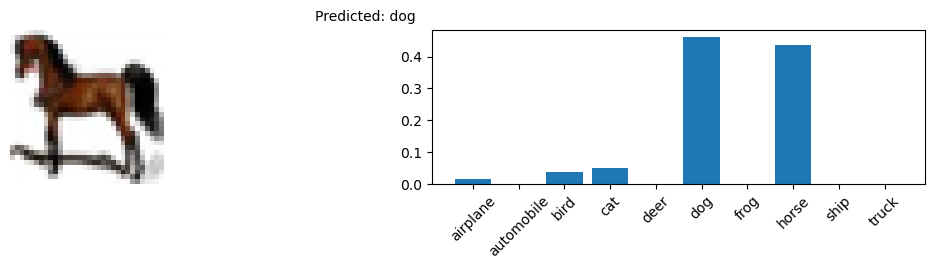

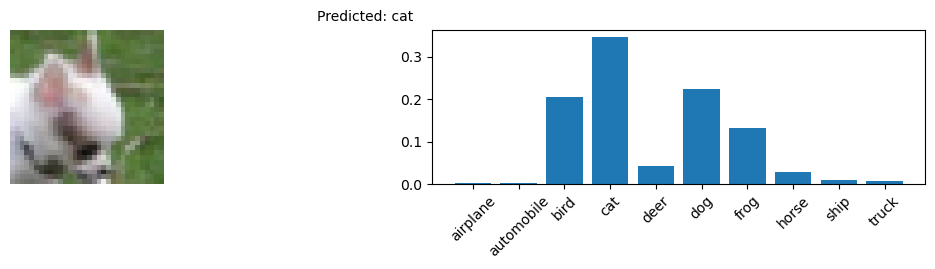

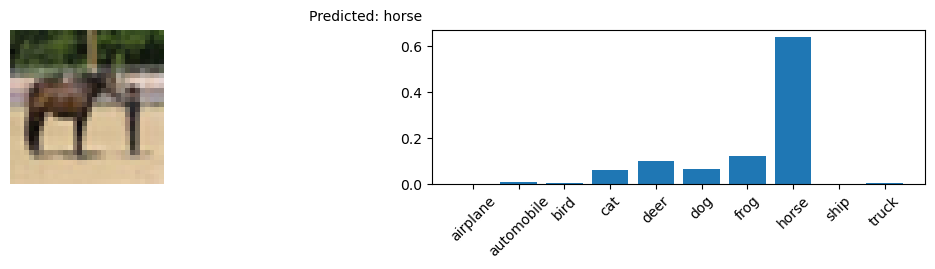

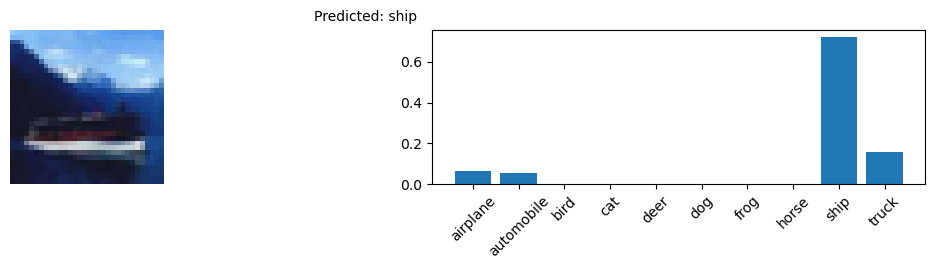

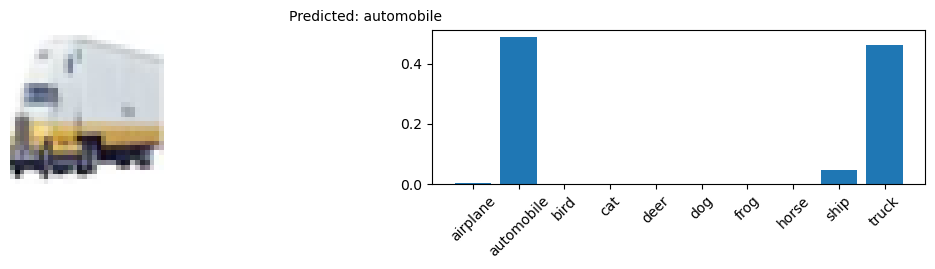

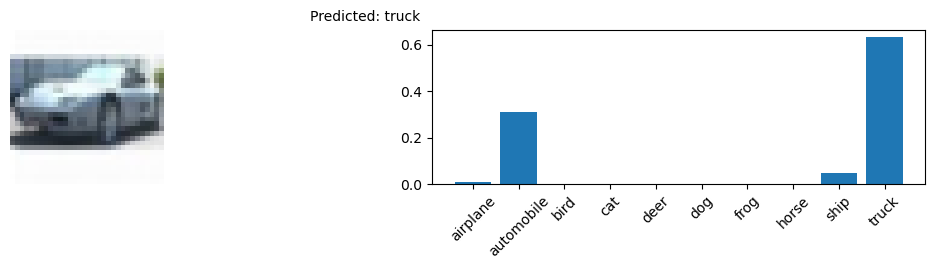

In [139]:
x = x_test
y = model(x)
start = 2000

label_names = ["airplane", "automobile", "bird", "cat", "deer",
               "dog", "frog", "horse", "ship", "truck"]

for k in range(10):
    plt.figure(figsize=(14, 2))

    # Display the image
    plt.subplot(1, 2, 1)
    plt.imshow(x[start + k].reshape((32, 32, 3)))
    plt.axis("off")

    # Display the prediction probabilities
    ind = np.arange(0, 10)
    plt.subplot(1, 2, 2)
    plt.bar(ind, y[start + k].numpy().flatten())  # Flatten prediction array
    plt.xticks(ind, label_names, rotation=45)  # Map labels to class names

    # Find the predicted class with the highest probability
    predicted_class_index = np.argmax(y[start + k].numpy())  # Index of highest probability
    predicted_class = label_names[predicted_class_index]  # Map index to class name

    # Set the title as the predicted class
    plt.suptitle(f"Predicted: {predicted_class}", fontsize=10)

    plt.show()

# CNN


In [140]:
keras.datasets.cifar10.load_data()
num_classes = 10

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [141]:
# Create the model
inputs_cnn = keras.Input(shape=(32, 32, 3))
x = keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu')(inputs_cnn)
x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu')(x)
x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)

x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(num_classes, activation="softmax")(x)

model = keras.Model(inputs=inputs_cnn, outputs=outputs, name="mnist_model_cnn")

In [142]:
model.summary()

Model: "mnist_model_cnn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_21 (InputLayer)     │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 10)             │        23,050 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,442 (165.79 KB)

 Trainable params: 42,442 (165.79 KB)

 Non-trainable params: 0 (0.00 B)

In [143]:
batch_size = 256
epochs = 80

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.05)

Epoch 1/80
186/186 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - accuracy: 0.2708 - loss: 1.9861 - val_accuracy: 0.4680 - val_loss: 1.4964
Epoch 2/80
186/186 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - accuracy: 0.4689 - loss: 1.4815 - val_accuracy: 0.5072 - val_loss: 1.3856
Epoch 3/80
186/186 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - accuracy: 0.5163 - loss: 1.3635 - val_accuracy: 0.5632 - val_loss: 1.2594
Epoch 4/80
186/186 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.5534 - loss: 1.2764 - val_accuracy: 0.5932 - val_loss: 1.2019
Epoch 5/80
186/186 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - accuracy: 0.5769 - loss: 1.2134 - val_accuracy: 0.6132 - val_loss: 1.1501
Epoch 6/80
186/186 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.5871 - loss: 1.1825 - val_accuracy: 0.6208 - val_loss: 1.1171
Epoch 7/80
186/186 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.6038 - loss: 1.1406 - val_accuracy: 0.6468 - val_loss: 1.0828
Epoch 8/80
186/186 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.6208 - loss: 1.0989 - val_accu

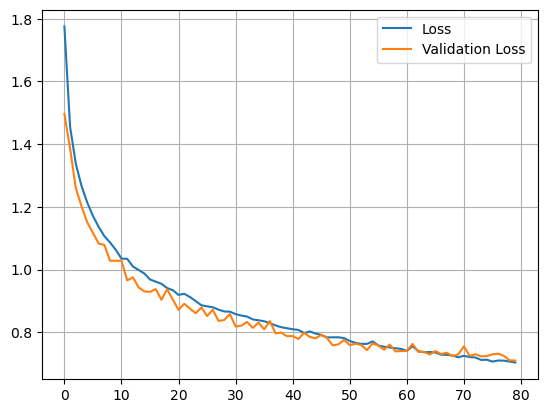

In [144]:
plt.plot(history.history["loss"], label="Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.grid()
plt.show()

In [145]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.726036012172699
Test accuracy: 0.7545999884605408


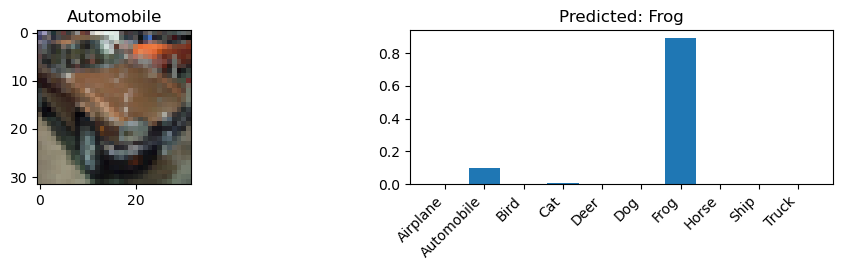

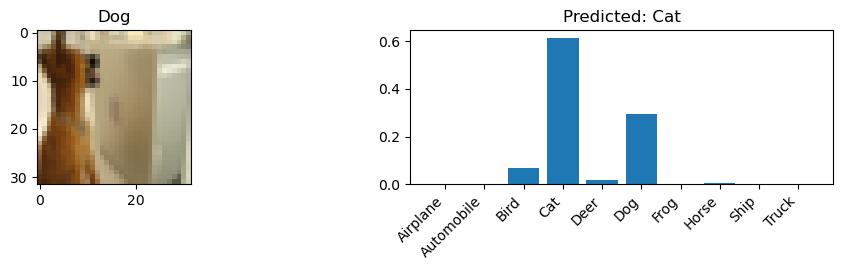

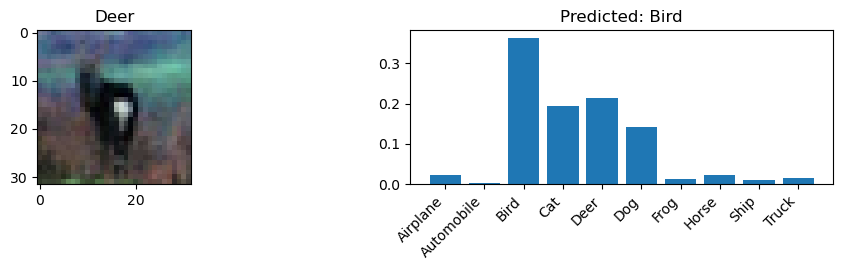

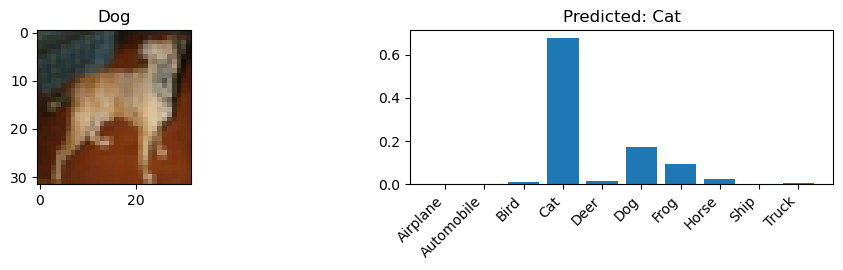

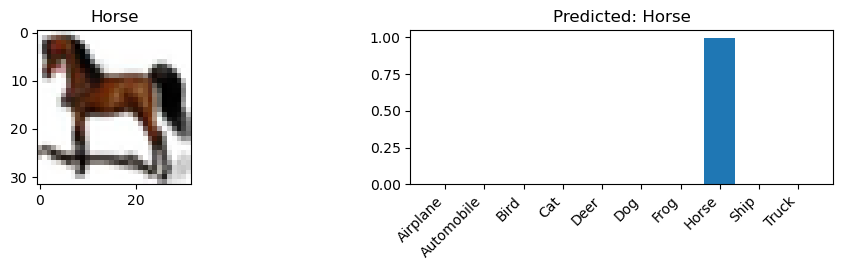

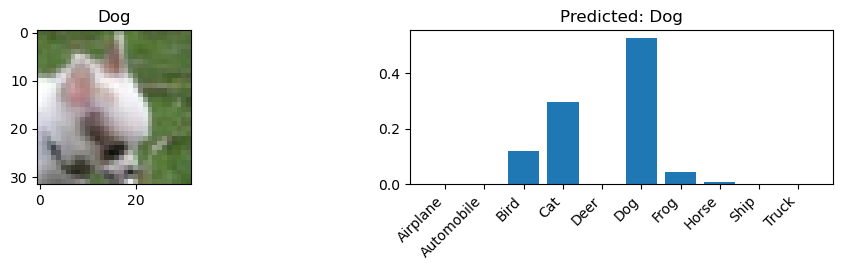

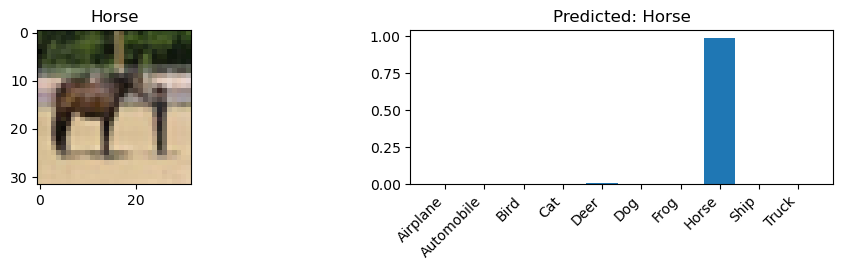

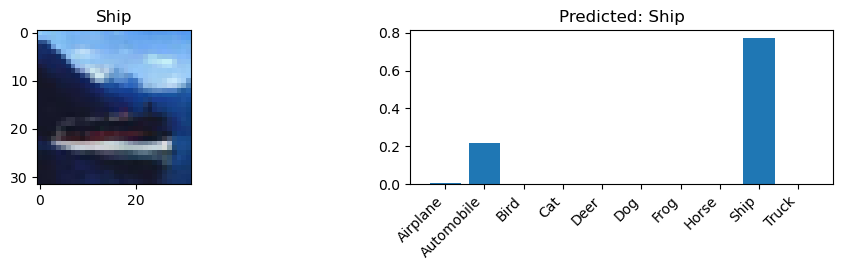

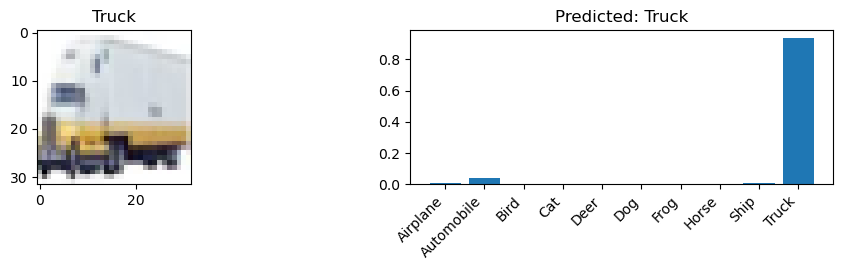

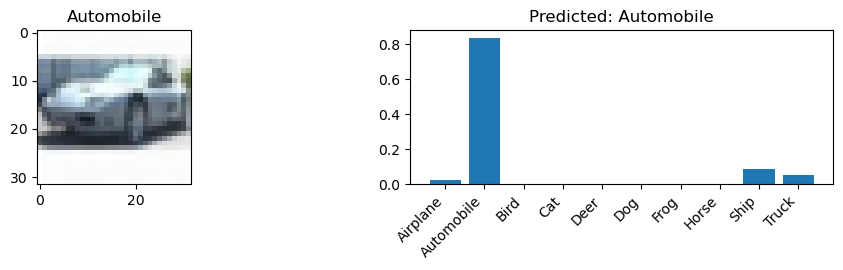

In [146]:
names = {0: "Airplane", 1: "Automobile", 2: "Bird", 3: "Cat", 
         4: "Deer", 5: "Dog", 6: "Frog", 7: "Horse", 8: "Ship", 9: "Truck"}

x = x_test
y = model(x)
start = 2000

for k in range(10):
    plt.figure(figsize=(12, 2))
    plt.subplot(1,2,1)
  
    plt.title(names[np.argmax(y_test[start+k])])
    plt.imshow(x[start+k])
    
    if x_test.shape[1] == 3072:
        x_test = x_test.reshape(-1, 32, 32, 3)
        
    ind = np.arange(0, 10)
    plt.subplot(1,2,2)
   
    plt.bar(ind, y[start+k].numpy().flatten()) 
    
   # Find the predicted class with the highest probability
    predicted_class_index = np.argmax(y[start + k].numpy())  # Index of highest probability
    predicted_class = names[predicted_class_index] 
    
     # Set the title as the predicted class
    plt.title(f"Predicted: {predicted_class}")
    
    # Tensorflow
    plt.xticks(range(10), [names[i] for i in range(10)], rotation=45, ha="right")